# **Lab 2 - Equazioni non lineari**

Si consideri il problema della ricerca degli zeri dell'equazione non
lineare $f(x)=0$, dove $f$ è definita da:
\begin{equation}
f(x):=e^{x}-x^{2}-\textrm{sin}(x)-1,\qquad x\in[-2,2]\;.
\end{equation}

# **Rappresentazione grafica della funzione**          
Disegnare il grafico della funzione $f$ e la retta $y=0$ in modo da evidenziare le due soluzioni dell'equazione.

In [1]:
# step 0 -> ricordarsi di importare i pacchetti numpy and matplotlib

import numpy as np
import matplotlib.pyplot as plt

Vediamo un nuovo costrutto utile per costruire funzioni matematiche "lambda function" in modo semplice e veloce.


      f = lambda nome_variabili: esperessione della funzione

In [2]:
# esempi di lambda function

f = lambda t: np.sin(t*np.pi)
g = lambda x: np.sin(x*np.pi) # la variabile è locale e quindi queste du funzioni sono uguali
h = lambda x,y,z: x+2*y+2*z

print("valuto la funzione f in 0.5: %f" % f(0.5))
print("valuto la funzione g in 0.5: %f" % g(0.5))
print("valuto la funzione h in (1,2,3): %f" % h(1,2,3))

valuto la funzione f in 0.5: 1.000000
valuto la funzione g in 0.5: 1.000000
valuto la funzione h in (1,2,3): 11.000000


Scrivere la funzione $f$ dell'esercizio usando la lambda function

In [3]:
# lambda function della funzione f

f = lambda x: np.exp(x) - x**2 - np.sin(x) - 1.0

Rappresentazione grafica

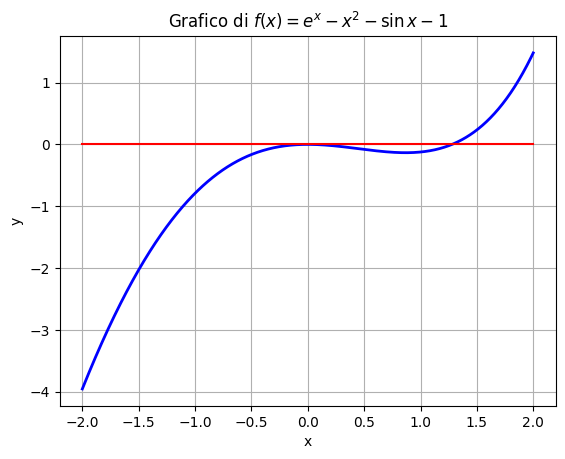

In [4]:
# rappresentazione grafica
# discretizzazione dell'intervallo [-2 2]
xgrid=np.linspace(-2,2,1000)
# plot di f
plt.plot(xgrid, f(xgrid),'b-',linewidth=2.0)
# plot asse y=0
plt.plot(xgrid,np.zeros(np.shape(xgrid)),'r-') # o semplicemente plt.plot([-2,2],[0,0],'r-')
# specifiche grafiche titolo, legenda, grid,
plt.title("Grafico di $f(x)=e^x-x^2-\sin x-1$")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

# **Bisezione**


<mark>**Domanda:**</mark></br>
 Il metodo di bisezione è applicabile per calcolare
entrambe le radici? Motivare la risposta.



<mark>**Esercizio 1.1: implementazione bisezione**</mark></br>

Scrivere una function $\verb|bisez|$ che implementi il metodo di bisezione. L'intestazione della funzione sarà ad esempio la seguente:


      def bisez(f,a,b,toll):
      #
      # implementazione di bisezione
      #
      return xvect


Tale funzione riceve in input:
* $\verb|f|→$ funzione di cui vogliamo calcolare gli zeri,
* $a→$ primo estremo
* $b→$ secondo estremo
* $\verb|toll|→$ tolleranza richiesta

e in out
* $\verb|xvect|→$ il vettore delle iterate.




In [5]:
# definizione del metodo di bisezione
def bisez(f, a, b, toll = 1e-6):

  # controllo se gli estremi sono una bracket (opzionale)
  if (f(a)*f(b)>=0):
   raise RuntimeError('ERRORE: l''intervallo [a,b] non è una bracket')

  # inizializzazione
  xvect = []

  while (abs(b-a)>toll):
    x = 0.5*(a+b)

    # primo controllo se x è uno zero (opzionale)
    if (f(x)==0):
      xvect.append(x)
      print("x è esattamente uno zero della funzione")
      break

    # metodo di bisezione
    if (f(a)*f(x)>0):
        a = x
    else:
        b = x

    xvect.append(x)

  return  np.array(xvect)

<mark>**Esercizio 1.2**</mark></br>
Quando è possibile, applicare il metodo di bisezione alla funzione $f$.
Stampare il numero di iterazioni, lo zero trovato $x^*$ e il valore della funzione $f(x^*)$.

In [6]:
# scelta degli estremi a,b
a , b = 1, 1.5
xvect = bisez(f, a, b, 1e-12)

x0 = xvect[-1]
print("Numero iterazioni: %d." % len(xvect))
print("Ultimo valore di x: %f" % x0)
print("Ultimo valore di f: %.e\n" % f(x0))

Numero iterazioni: 39.
Ultimo valore di x: 1.279701
Ultimo valore di f: 7e-13



# **Metodo di Newton**

<mark>**Domanda:**</mark></br>
Discutere le proprietà  di convergenza del metodo di Newton per
  entrambi gli zeri, valutando l'opportunità  di applicare il metodo
  di Newton.





<mark>**Esercizio 2.1: implementazione Newton**</mark></br>
Scrivere una function $\verb|newton|$ che implementi il metodo di Newton. L'intestazione della funzione sarà ad esempio la seguente:


      def newton (f,df,x0,nmax,toll)
      #
      # implementazione del metodo di newton
      #
      return xvect

Tale funzione riceve in input:
* $\verb|f|→$ funzione di cui vogliamo calcolare gli zeri,
* $\verb|df|→$ la derivata della funzione $f$,
* $x_0→$ punto di partenza
* $\verb|nmax|→$ numero massimo di iterazione
* $\verb|toll|→$ tolleranza richiesta

e in out
* $\verb|xvect|→$ il vettore delle iterate.

Si utilizzi un criterio d'arresto basato sul modulo della differenza tra due iterate successive.


In [7]:
# Definizione del metodo di Newton (questa è già la versione modificata)
def newton (f,df,x0,nmax=100,toll=1e-6,m=1) :

  xvect=[]
  xold = x0

  for nit in range(nmax) :
    # verifica che la derivata prima non è nulla
    if (df(xold) == 0): # if (abs(df(xold)<np.finfo(float).eps): -> questo un altro modo
       raise RuntimeError('ERRORE: Derivata prima nulla \n')
    else :
      # calcolo il nuovo punto
      xnew=xold-m*f(xold)/df(xold)
      #carico i vettori
      xvect.append(xnew)

    # criterio di arresto e aggiorno
    if (abs(xnew-xold) < toll) :
        break
    else :
        xold=xnew

  return np.array(xvect)


<mark>**Esercizio 2.2: modifica di Newton**</mark></br>
Si scriva, modificando opportunamente la function $\verb|newton|$,
il metodo di Newton modificato, passando come parametro in ingresso anche la molteplicità dello zero cercato. L'intestazione della funzione sarà la seguente:


      def newton (f,df,x0,nmax,toll,m=1)
        #
        # modificare il passo iteratativo di newton
        #  x^{k+1} = x^k - m f(x^k)/f'(x^k)
        #
        return xvect

dove $\verb|m|$ è la molteplicità dello zero cercato.


<mark>**Esercizio 2.3**</mark></br>

Applicare il metodo di Newton e, quando è il caso, il metodo di Newton modificato (aggiungendo la specifica $\verb|m|$) con tolleranza $10^{-6}$, per la funzione
\begin{equation}
f(x):=e^{x}-x^{2}-\textrm{sin}(x)-1,\qquad x\in[-2,2]\;.
\end{equation}
Riportare su un grafico in scala semilogaritmica l'andamento dell'errore in funzione del numero di iterazioni. Per il calcolo dell'errore si assuma come valore esatto dello zero non nullo, il valore $x=1.279701331000996$. Cosa si osserva nell'ordine di convergenza?


In [8]:
# funzione f e la sua derivata df
f = lambda t: np.exp(t) - t**2 - np.sin(t) - 1.0
df = lambda t: np.exp(t) - 2*t - np.cos(t)

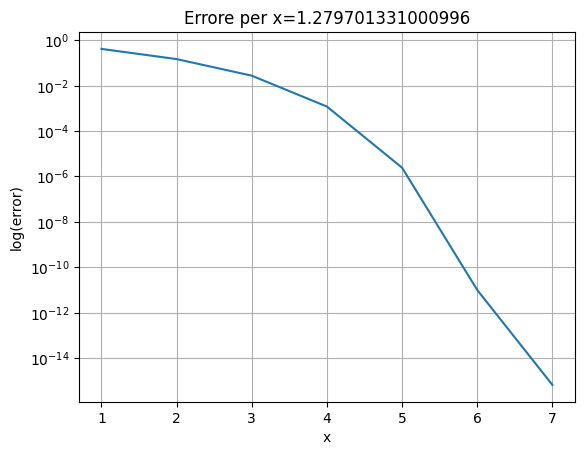

In [9]:
# ricerca dello zero xe=1.279701331000996
xe=1.279701331000996
# starting point
x0=1

xvect = newton(f, df, x0, 100, 1e-6)
# calcolo dell'errore
error = np.abs(xe-xvect)

# rappresentazione grafica dell'errore
plt.semilogy(np.arange(1,len(xvect)+1), error)
plt.title("Errore per x=%.15f" % xe)
plt.xlabel('x')
plt.ylabel('log(error)')
plt.grid()
plt.show()


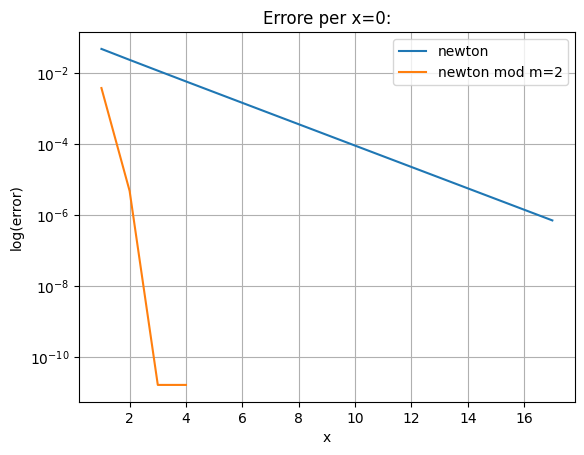

In [10]:
# Ricerca dello zero xe=0
xe=0
# starting point
x0=0.1

# chiamo newton
xvect_n=newton(f,df,x0,100, 1e-6)
# calcolo dell'errore per newton
error_n = np.abs(xe-xvect_n)

# chiamo newton modificato con m=2
xvect_nm=newton(f,df,x0,100, 1e-6, m=2)
# calcolo dell'errore per newton modificato
error_nm = np.abs(xe-xvect_nm)

plt.semilogy(np.arange(1,len(xvect_n)+1), error_n)
plt.semilogy(np.arange(1,len(xvect_nm)+1), error_nm)
plt.legend(['newton', 'newton mod m=2'])
plt.title("Errore per x=%d:" % xe)
plt.xlabel('x')
plt.ylabel('log(error)')
plt.grid()
plt.show()